In [2]:
# Import libraries

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import plot_model



import tensorflow_datasets as tfds

In [3]:
# Load the data

p_camelyon, p_camelyon_info = tfds.load("patch_camelyon", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incomplete9Q6GOW/patch_camelyon-test.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incomplete9Q6GOW/patch_camelyon-train.tfrecord


  0%|          | 0/262144 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incomplete9Q6GOW/patch_camelyon-validation.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.


In [4]:
# Defining a "normalize" function to process the data before feeding it into the deep neural network. 

def normalize(x):
  image, label = x['image'], x['label']
  image = tf.image.convert_image_dtype(image, tf.float32)
  label = tf.one_hot(label, 2, dtype=tf.float32)
  return image, label

In [39]:
# Applying "normalize" function along with others to the data

# Processing the training dataset
train_ds = p_camelyon['train'].map(normalize, num_parallel_calls=8)
train_ds = train_ds.shuffle(1024)
train_ds = train_ds.repeat()
train_ds = train_ds.batch(32)
train_ds = train_ds.prefetch(2)

# Processing validation dataset
validation_ds = p_camelyon['validation'].map(normalize, num_parallel_calls=8)
validation_ds = validation_ds.repeat()
validation_ds = validation_ds.batch(128)
validation_ds = validation_ds.prefetch(2)

#Processing the test dataset
test_ds = p_camelyon['test'].map(normalize, num_parallel_calls=8)
test_ds = test_ds.batch(128)
test_ds = test_ds.prefetch(2)

#Seperating image and label into different variables
train_images, train_labels = next(iter(train_ds))
valid_images, valid_labels = next(iter(validation_ds))
test_images, test_labels  = next(iter(test_ds))


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 16)        4624      
                                                             

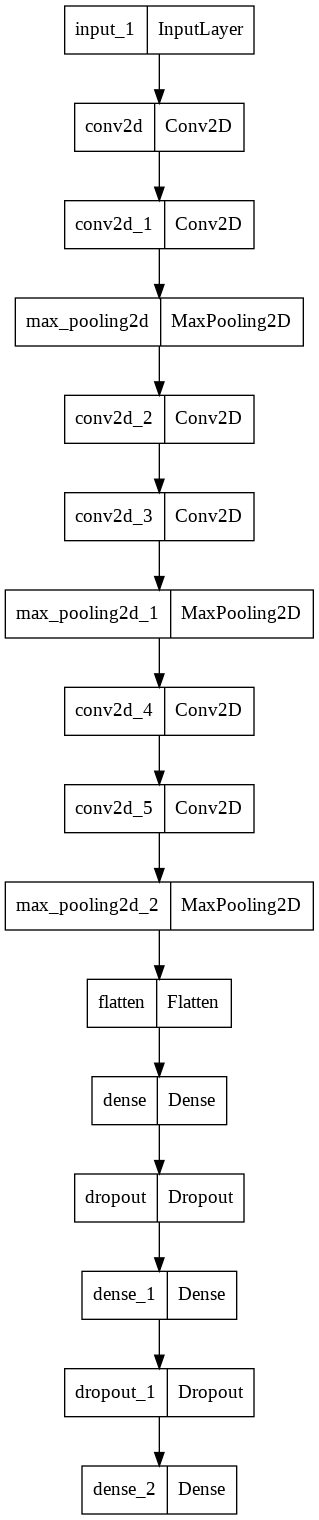

In [6]:
# Building the Convolutonal Nueral Network Model 1.1 (Version 2)

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Relu activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = hinge
model_1_1_version_2 = Model(inputs=input, outputs = output)
model_1_1_version_2.compile(optimizer='adam', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_1_1_version_2.summary()
plot_model(model_1_1_version_2)

In [7]:
# Building the Convolutonal Nueral Network Model 1.2 (Version 2)

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Relu activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function =   MSE
model_1_2_version_2 = Model(inputs=input, outputs = output)
model_1_2_version_2.compile(optimizer='adam', 
              loss='MSE',
              metrics=['acc'])

model_1_2_version_2.summary()
#plot_model(model_1_2_version_2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 44, 44, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 42, 42, 16)        4624      
                                                           

In [19]:
# Building the Convolutonal Nueral Network Model 2.1 (Version 2)

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Sigmoid activation functions only with softmax for the last Dense layer

x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = hinge
model_2_1_version_2 = Model(inputs=input, outputs = output)
model_2_1_version_2.compile(optimizer='adam', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_2_1_version_2.summary()
#plot_model(model_2_2_version_2)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 conv2d_37 (Conv2D)          (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 46, 46, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 42, 42, 16)        4624      
                                                           

In [9]:
# Building the Convolutonal Nueral Network Model 2.2 (Version 2)

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Sigmoid activation functions only with softmax for the last Dense layer

x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = MSE
model_2_2_version_2 = Model(inputs=input, outputs = output)
model_2_2_version_2.compile(optimizer='adam', 
              loss='MSE',
              metrics=['acc'])

model_2_2_version_2.summary()
#plot_model(model_2_2_version_2)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 conv2d_19 (Conv2D)          (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 46, 46, 16)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 conv2d_21 (Conv2D)          (None, 42, 42, 16)        4624      
                                                           

In [10]:
# Building the Convolutonal Neural Network Model 3.1 (Version 2)

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# A conbination of relu and sigmoid activation functions
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = hinge
model_3_1_version_2 = Model(inputs=input, outputs = output)
model_3_1_version_2.compile(optimizer='adam', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_3_1_version_2.summary()
#plot_model(model_3_1_version_2)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 conv2d_25 (Conv2D)          (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 46, 46, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 conv2d_27 (Conv2D)          (None, 42, 42, 32)        9248      
                                                           

In [27]:
# Building the Convolutonal Neural Network Model 3.2 (Version 2)

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# A conbination of relu and sigmoid activation functions
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = MSE
model_3_2_version_2 = Model(inputs=input, outputs = output)
model_3_2_version_2.compile(optimizer='adam', 
              loss='MSE',
              metrics=['acc'])

model_3_2_version_2.summary()
#plot_model(model_3_2_version_2)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 conv2d_43 (Conv2D)          (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 46, 46, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 conv2d_45 (Conv2D)          (None, 42, 42, 32)        9248      
                                                           

In [40]:
import math

batch_size_for_training = 32
batch_size_for_validation = 128
batch_size_for_test = 128

training_size = 262144
validation_size = 32768
test_size =  32768
        

# Calculate steps for training and testing the model
calculate_steps_training = lambda x: int(math.ceil(1. * x / batch_size_for_training))
calculate_steps_validation = lambda x: int(math.ceil(1. * x / batch_size_for_validation))
calculate_steps_test= lambda x: int(math.ceil(1. * x / batch_size_for_test))

steps_per_epoch = calculate_steps_training(training_size) 
validation_steps = calculate_steps_validation(validation_size)
steps = calculate_steps_test(test_size)

print("Training steps: ", steps_per_epoch)
print("Validation steps: ", validation_steps)
print("Testing steps: ", steps)


Training steps:  8192
Validation steps:  256
Testing steps:  256


In [13]:
import matplotlib.pyplot as plt

def plot_hist(history):
  plt.plot(history.history["acc"])
  plt.plot(history.history["val_acc"])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

In [41]:
# Training the model 1.1 (Version 2)

history_1_1_version_2= model_1_1_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 117s 14ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 2/10
8192/8192 [==============================] - 116s 14ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 3/10
8192/8192 [==============================] - 124s 15ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 4/10
8192/8192 [==============================] - 121s 15ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 5/10
8192/8192 [==============================] - 123s 15ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 6/10
8192/8192 [==============================] - 129s 16ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 7/10
8192/8192 [==============================] - 116s 14ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 8/10
8192/8192 [===================

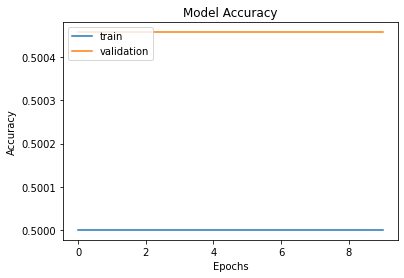

In [42]:
plot_hist(history_1_1_version_2)

In [43]:
# Training the model 1.2 (Version 2)

history_1_2_version_2= model_1_2_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 115s 14ms/step - loss: 0.0508 - acc: 0.9360 - val_loss: 0.1318 - val_acc: 0.8319
Epoch 2/10
8192/8192 [==============================] - 114s 14ms/step - loss: 0.0488 - acc: 0.9382 - val_loss: 0.1422 - val_acc: 0.8098
Epoch 3/10
8192/8192 [==============================] - 115s 14ms/step - loss: 0.0506 - acc: 0.9361 - val_loss: 0.1325 - val_acc: 0.8217
Epoch 4/10
8192/8192 [==============================] - 125s 15ms/step - loss: 0.0517 - acc: 0.9347 - val_loss: 0.1239 - val_acc: 0.8452
Epoch 6/10
8192/8192 [==============================] - 118s 14ms/step - loss: 0.0517 - acc: 0.9345 - val_loss: 0.1989 - val_acc: 0.7459
Epoch 7/10
8192/8192 [==============================] - 118s 14ms/step - loss: 0.0521 - acc: 0.9342 - val_loss: 0.1228 - val_acc: 0.8404
Epoch 8/10
8192/8192 [==============================] - 125s 15ms/step - loss: 0.0551 - acc: 0.9293 - val_loss: 0.1233 - val_acc: 0.8487
Epoch 9/10
8192/8192 [===================

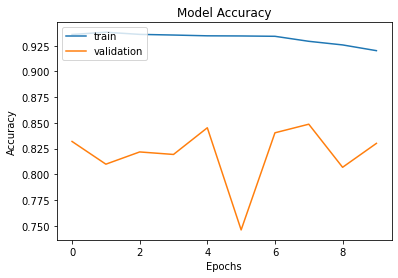

In [44]:
plot_hist(history_1_2_version_2)

In [45]:
# Training the model 2.1 (Version 2)

history_2_1_version_2= model_2_2_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 115s 14ms/step - loss: 0.2500 - acc: 0.5013 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 2/10
8192/8192 [==============================] - 114s 14ms/step - loss: 0.2500 - acc: 0.5009 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 3/10
8192/8192 [==============================] - 117s 14ms/step - loss: 0.2500 - acc: 0.5008 - val_loss: 0.2501 - val_acc: 0.5005
Epoch 4/10
8192/8192 [==============================] - 120s 15ms/step - loss: 0.2500 - acc: 0.5007 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 5/10
8192/8192 [==============================] - 121s 15ms/step - loss: 0.2500 - acc: 0.5008 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 6/10
8192/8192 [==============================] - 123s 15ms/step - loss: 0.2500 - acc: 0.5009 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 7/10
8192/8192 [==============================] - 125s 15ms/step - loss: 0.2500 - acc: 0.5001 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 8/10
8192/8192 [===================

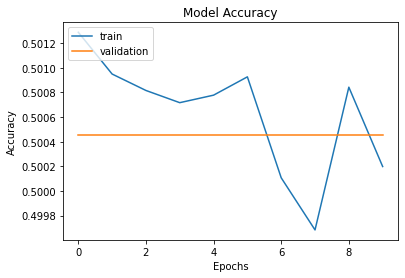

In [46]:
plot_hist(history_2_1_version_2)

In [47]:
# Training the model 2.2 (Version 2)

history_2_2_version_2= model_2_2_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 114s 14ms/step - loss: 0.2500 - acc: 0.5005 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 2/10
8192/8192 [==============================] - 113s 14ms/step - loss: 0.2500 - acc: 0.5005 - val_loss: 0.2501 - val_acc: 0.5005
Epoch 3/10
8192/8192 [==============================] - 116s 14ms/step - loss: 0.2500 - acc: 0.5001 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 4/10
8192/8192 [==============================] - 120s 15ms/step - loss: 0.2500 - acc: 0.4999 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 5/10
8192/8192 [==============================] - 117s 14ms/step - loss: 0.2500 - acc: 0.5010 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 6/10
8192/8192 [==============================] - 123s 15ms/step - loss: 0.2500 - acc: 0.5011 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 8/10
8192/8192 [==============================] - 117s 14ms/step - loss: 0.2500 - acc: 0.5010 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 9/10
8192/8192 [===================

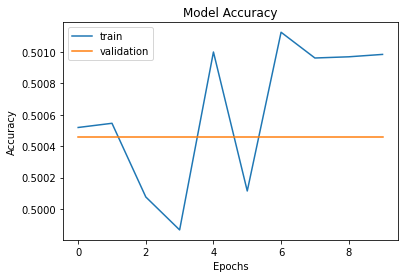

In [48]:
plot_hist(history_2_2_version_2)

In [49]:
# Training the model 3.1 (Version 2)

history_3_1_version_2= model_3_1_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 117s 14ms/step - loss: 1.0003 - acc: 0.4997 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 2/10
8192/8192 [==============================] - 120s 15ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 4/10
8192/8192 [==============================] - 118s 14ms/step - loss: 1.0001 - acc: 0.4999 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 5/10
8192/8192 [==============================] - 123s 15ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 6/10
8192/8192 [==============================] - 116s 14ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 7/10
8192/8192 [==============================] - 120s 15ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 8/10
8192/8192 [==============================] - 120s 15ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 9/10
8192/8192 [===================

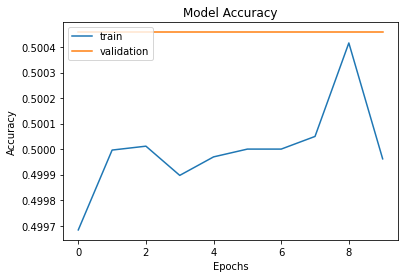

In [50]:
plot_hist(history_3_1_version_2)

In [51]:
# Training the model 3.2 (Version 2)

history_3_2_version_2= model_3_2_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 115s 14ms/step - loss: 0.2502 - acc: 0.4997 - val_loss: 0.2501 - val_acc: 0.5005
Epoch 2/10
8192/8192 [==============================] - 115s 14ms/step - loss: 0.2502 - acc: 0.5005 - val_loss: 0.2504 - val_acc: 0.5005
Epoch 3/10
8192/8192 [==============================] - 116s 14ms/step - loss: 0.2502 - acc: 0.5011 - val_loss: 0.2502 - val_acc: 0.5005
Epoch 4/10
8192/8192 [==============================] - 114s 14ms/step - loss: 0.2502 - acc: 0.5009 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 5/10
8192/8192 [==============================] - 117s 14ms/step - loss: 0.2502 - acc: 0.5012 - val_loss: 0.2502 - val_acc: 0.5005
Epoch 6/10
8192/8192 [==============================] - 121s 15ms/step - loss: 0.2502 - acc: 0.5002 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 7/10
8192/8192 [==============================] - 115s 14ms/step - loss: 0.2502 - acc: 0.5007 - val_loss: 0.2507 - val_acc: 0.5005
Epoch 8/10
8192/8192 [===================

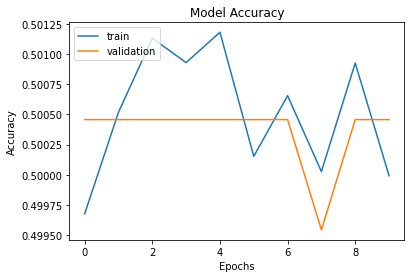

In [52]:
plot_hist(history_3_2_version_2)

In [53]:
# Testing the models

print("Test dataset accuracy for model 1.1 version 2 is: {0:.4f}".format(model_1_1_version_2.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 1.2 version 2 is: {0:.4f}".format(model_1_2_version_2.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.1 version 2 is: {0:.4f}".format(model_2_1_version_2.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.2 version 2 is: {0:.4f}".format(model_2_2_version_2.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.1 version 2 is: {0:.4f}".format(model_3_1_version_2.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.2 version 2 is: {0:.4f}".format(model_3_2_version_2.evaluate(test_ds, steps=steps, verbose=1)[1]))

256/256 [==============================] - 10s 38ms/step - loss: 0.9998 - acc: 0.5002
Test dataset accuracy for model 1.1 version 2 is: 0.5002
256/256 [==============================] - 10s 37ms/step - loss: 0.1328 - acc: 0.8403
Test dataset accuracy for model 1.2 version 2 is: 0.8403
256/256 [==============================] - 10s 37ms/step - loss: 0.9999 - acc: 0.5002
Test dataset accuracy for model 2.1 version 2 is: 0.5002
256/256 [==============================] - 10s 37ms/step - loss: 0.2500 - acc: 0.5002
Test dataset accuracy for model 2.2 version 2 is: 0.5002
256/256 [==============================] - 10s 37ms/step - loss: 0.9998 - acc: 0.5002
Test dataset accuracy for model 3.1 version 2 is: 0.5002
256/256 [==============================] - 10s 37ms/step - loss: 0.2501 - acc: 0.5002
Test dataset accuracy for model 3.2 version 2 is: 0.5002
